In [1]:
import numpy as np
import scipy.integrate as numsolvers
import matplotlib.pyplot as plt

**Oldjuk meg egy inga mozgásának differenciálegyenletét.**

In [2]:
def diff_equation(t, r):
    derivatives = np.zeros(2)
    # inga mozgás diffegyenlete:
    # x derivált = y
    derivatives[0] = r[1]
    # y derivált = -x
    derivatives[1] = -r[0]
    return derivatives


## DE solver numerikusan, beépített fv-ekkel.

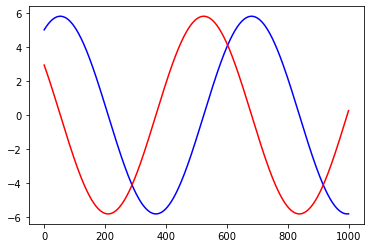

In [3]:
init = [5, 3]
T = 10
time_step = 0.01
states = np.zeros((int(T/time_step)+1, 2))

r = numsolvers.ode(diff_equation).set_integrator('vode', method='bdf', with_jacobian=False)
r.set_initial_value(init, 0)
ind = 0
while r.successful() and r.t < T:
    r.integrate(r.t + time_step)
    states[ind, :] = r.y
    ind += 1
    
plt.plot(states[:, 0], 'b')
plt.plot(states[:, 1], 'r')
plt.show()

## Euler módszer saját implementáció

In [4]:
def Euler(f, y0, start_time, end_time, h):
    t, y = start_time, y0
    ind = 0
    while t <= end_time:
        t += h
        y += h*f(t,y)
        states[ind, :] = y
        ind += 1

Szimuláció futtatása.

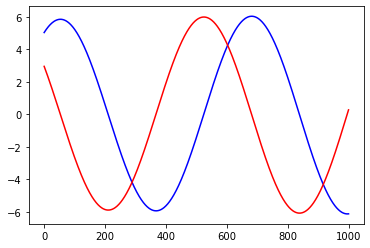

In [5]:
init = [5, 3]
T = 10
time_step = 0.01
states = np.zeros((int(T/time_step)+1, 2))

y = Euler(diff_equation, init, 0, T, time_step)
    
plt.plot(states[:, 0], 'b')
plt.plot(states[:, 1], 'r')
plt.show()